In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

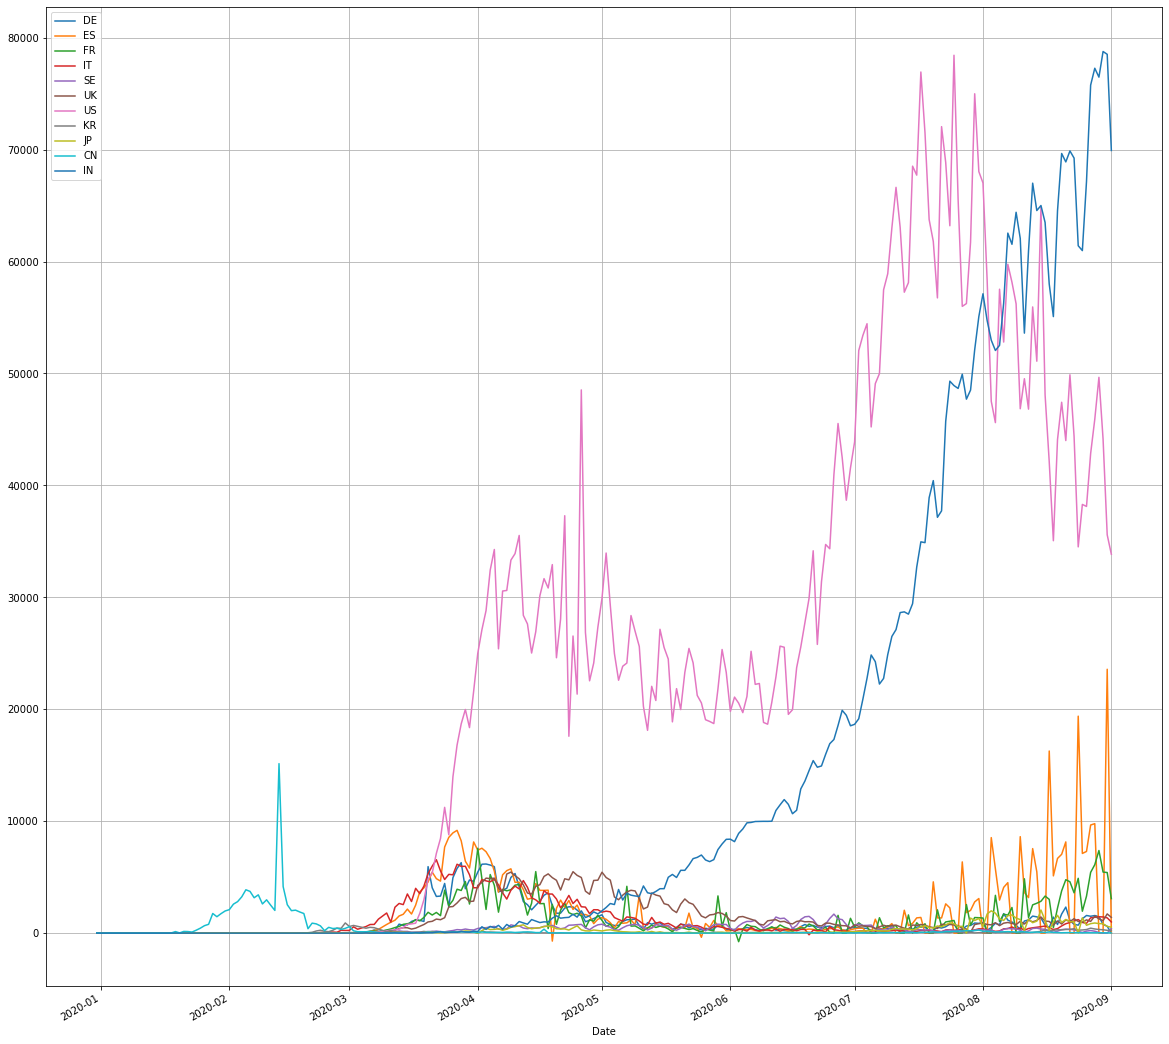

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

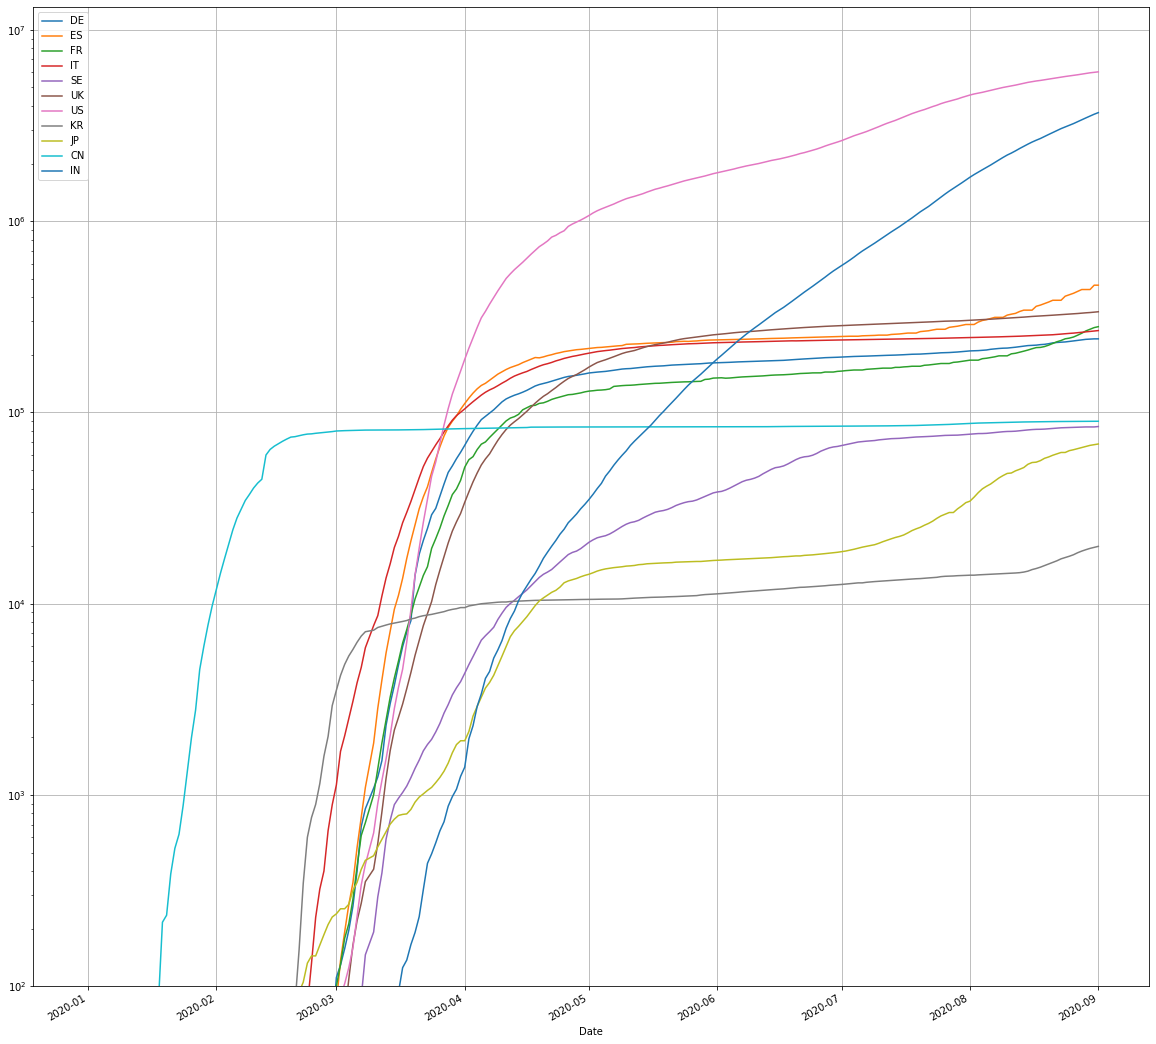

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

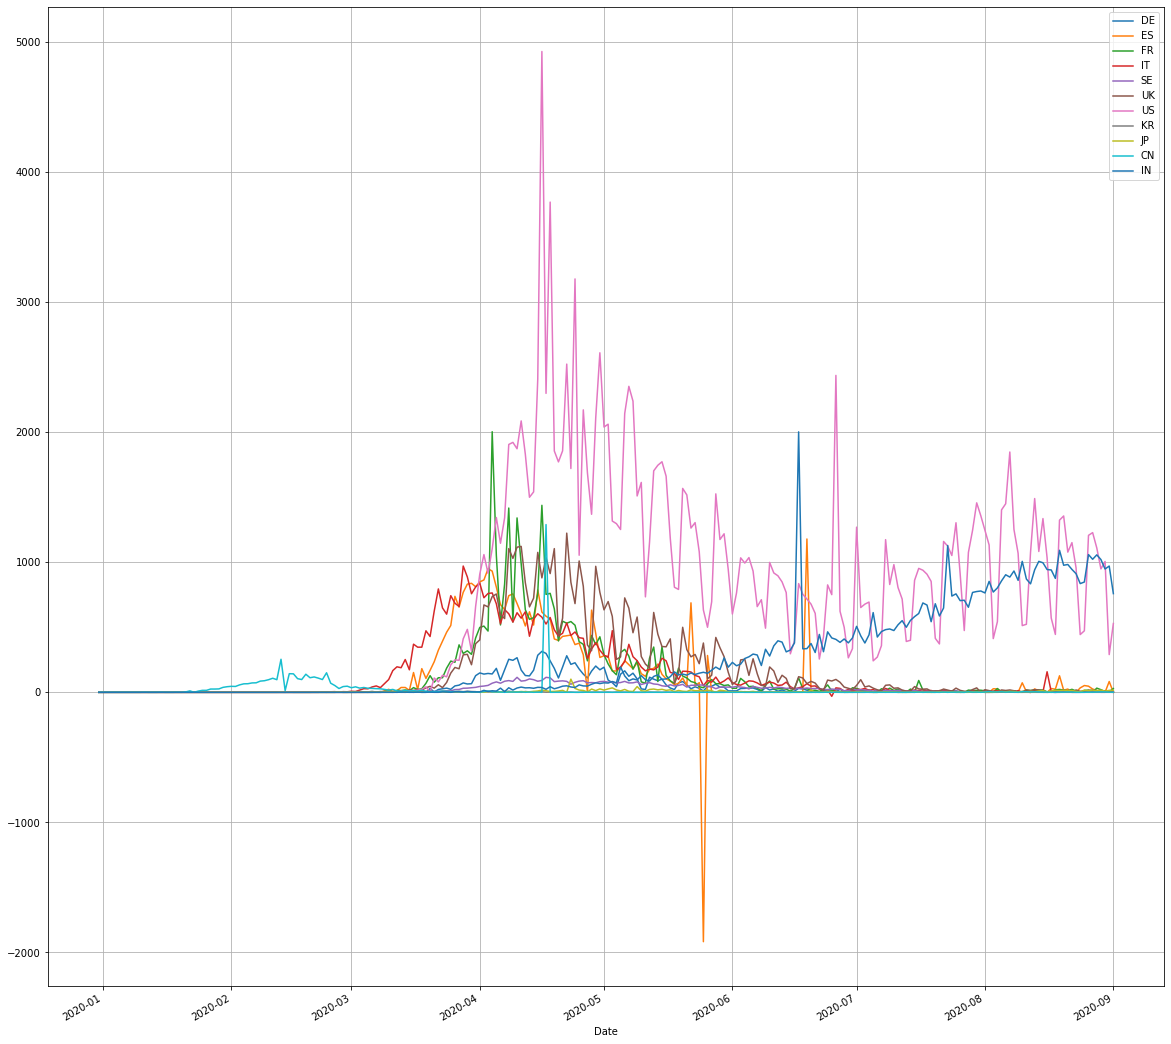

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

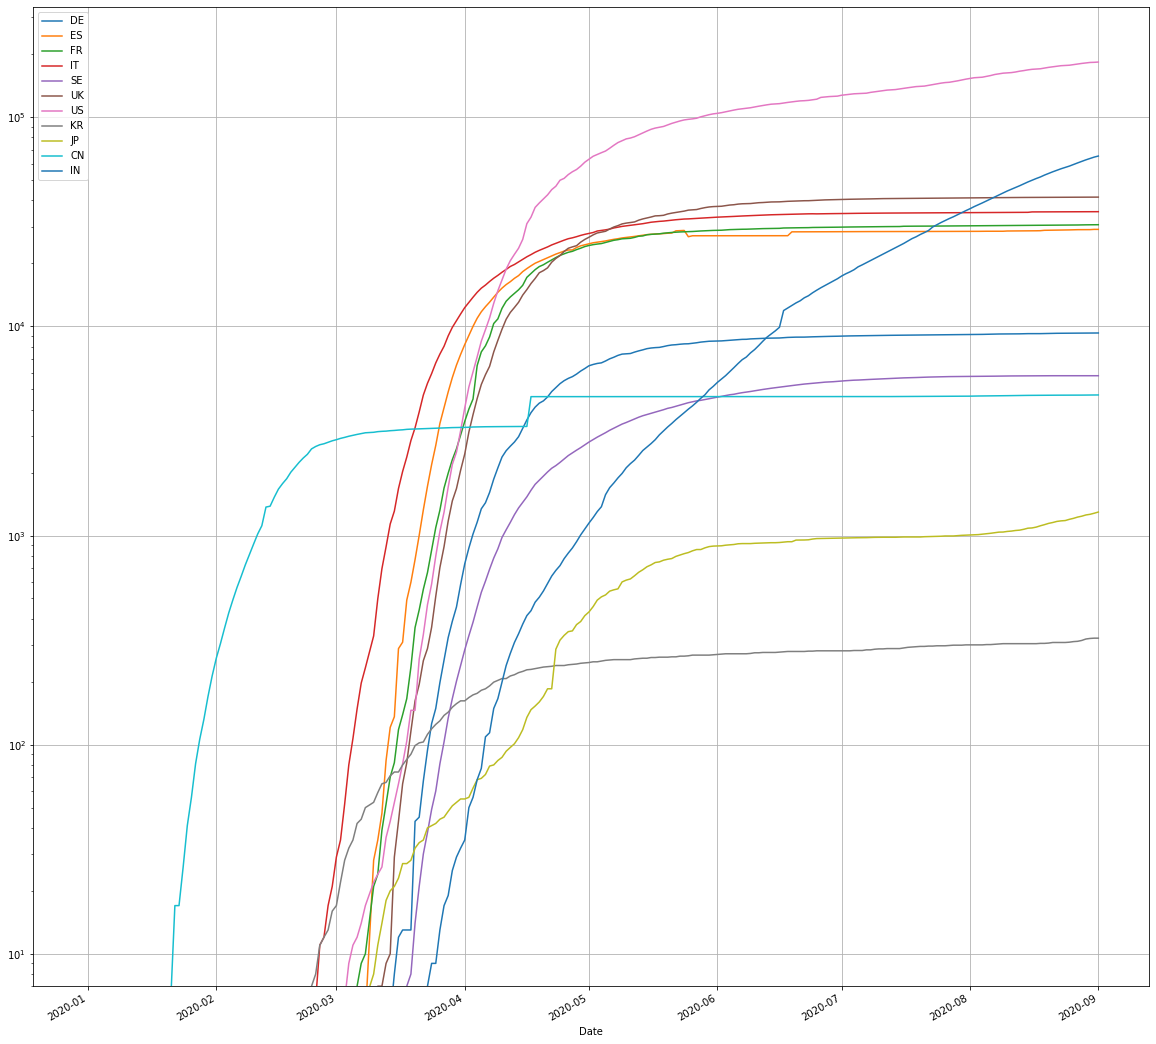

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-08-18,1431.0,5114.0,493,320,63,713,35056,246,1006,66,55079
12,2020-08-19,769.0,6671.0,2238,401,174,1089,44091,297,1592,53,64531
11,2020-08-20,1707.0,7039.0,3776,642,314,812,47426,288,951,33,69652
10,2020-08-21,2327.0,8148.0,4771,840,351,1182,44005,324,1220,40,68898
9,2020-08-22,1134.0,0.0,4586,947,333,1033,49880,332,1012,49,69878
8,2020-08-23,782.0,0.0,3602,1071,298,1288,44378,397,1014,38,69239
7,2020-08-24,711.0,19382.0,4897,1209,160,1041,34506,266,7,41,61408
6,2020-08-25,1278.0,7117.0,1955,953,57,972,38298,280,1367,23,60975
5,2020-08-26,1576.0,7296.0,3304,876,182,1184,38119,320,701,34,67151
4,2020-08-27,1507.0,9658.0,5429,1366,227,1048,42848,441,846,32,75760


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-08-18,226090.0,363763.0,218619.0,252743.0,81598.0,319137.0,5438204.0,15513.0,55925.0,89396.0,2702742.0
2020-08-19,226859.0,370434.0,220857.0,253144.0,81772.0,320226.0,5482295.0,15810.0,57517.0,89449.0,2767273.0
2020-08-20,228566.0,377473.0,224633.0,253786.0,82086.0,321038.0,5529721.0,16098.0,58468.0,89482.0,2836925.0
2020-08-21,230893.0,385621.0,229404.0,254626.0,82437.0,322220.0,5573726.0,16422.0,59688.0,89522.0,2905823.0
2020-08-22,232027.0,385621.0,233990.0,255573.0,82770.0,323253.0,5623606.0,16754.0,60700.0,89571.0,2975701.0
2020-08-23,232809.0,385621.0,237592.0,256644.0,83068.0,324541.0,5667984.0,17151.0,61714.0,89609.0,3044940.0
2020-08-24,233520.0,405003.0,242489.0,257853.0,83228.0,325582.0,5702490.0,17417.0,61721.0,89650.0,3106348.0
2020-08-25,234798.0,412120.0,244444.0,258806.0,83285.0,326554.0,5740788.0,17697.0,63088.0,89673.0,3167323.0
2020-08-26,236374.0,419416.0,247748.0,259682.0,83467.0,327738.0,5778907.0,18017.0,63789.0,89707.0,3234474.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-08-18,0.0,24.0,19,4,-1,3,445,1,16,0,876
12,2020-08-19,11.0,127.0,22,5,0,12,1324,0,14,2,1092
11,2020-08-20,10.0,16.0,17,7,0,16,1356,1,16,1,977
10,2020-08-21,7.0,25.0,12,6,0,6,1078,2,11,3,983
9,2020-08-22,7.0,0.0,23,9,0,2,1151,0,14,2,945
8,2020-08-23,2.0,0.0,9,3,0,18,956,0,7,0,912
7,2020-08-24,3.0,34.0,1,7,0,6,444,0,4,0,836
6,2020-08-25,5.0,52.0,15,4,0,4,473,1,16,0,848
5,2020-08-26,3.0,47.0,16,4,0,16,1207,2,13,1,1059
4,2020-08-27,5.0,25.0,0,13,0,16,1228,1,17,1,1023


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-08-18,9232.0,28670.0,30420.0,35267.0,5808.0,41369.0,170493.0,305.0,1113.0,4680.0,51797.0
2020-08-19,9243.0,28797.0,30442.0,35272.0,5808.0,41381.0,171817.0,305.0,1127.0,4682.0,52889.0
2020-08-20,9253.0,28813.0,30459.0,35279.0,5808.0,41397.0,173173.0,306.0,1143.0,4683.0,53866.0
2020-08-21,9260.0,28838.0,30471.0,35285.0,5808.0,41403.0,174251.0,308.0,1154.0,4686.0,54849.0
2020-08-22,9267.0,28838.0,30494.0,35294.0,5808.0,41405.0,175402.0,308.0,1168.0,4688.0,55794.0
2020-08-23,9269.0,28838.0,30503.0,35297.0,5808.0,41423.0,176358.0,308.0,1175.0,4688.0,56706.0
2020-08-24,9272.0,28872.0,30504.0,35304.0,5808.0,41429.0,176802.0,308.0,1179.0,4688.0,57542.0
2020-08-25,9277.0,28924.0,30519.0,35308.0,5808.0,41433.0,177275.0,309.0,1195.0,4688.0,58390.0
2020-08-26,9280.0,28971.0,30535.0,35312.0,5808.0,41449.0,178482.0,311.0,1208.0,4689.0,59449.0
